# Statistical Decision Making
## Task 2

The MNIST training set consists of handwritten digits from 0 to 9, stored as PNG files of size $28 \times 28$ and indexed by label. Download the provided ZIP file from Moodle and make yourself familiar with the directory structure.

a) Grayscale images are typically described as matrices of `uint8` values. For numerical calculations, it is more sensible to work with floating point numbers. Load two (abitrary) images from the database and convert them to matrices `I1` and `I2` of `float64` values in the interval $[0, 1]$.

In [11]:
import numpy as np
import imageio
data_folder = './mnist/'

path1 = data_folder+'d0/d0_0075.png'
path2 = data_folder+'d1/d1_0055.png'


d0 = imageio.imread(path1).astype(np.float64)  
d1 = imageio.imread(path2).astype(np.float64)  

In [41]:
print(d0.shape)
print(d1.shape)
#print(d0)
#print(d1)

(28, 28)
(28, 28)


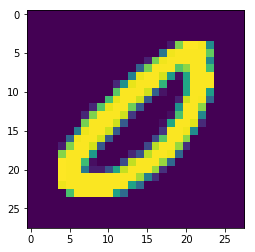

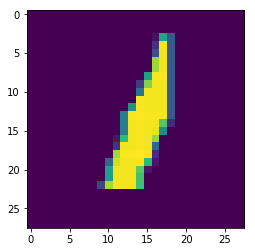

In [13]:
import matplotlib.pyplot as plt
plt.imshow(d0)
plt.show()
plt.imshow(d1)
plt.show()

<td bgcolor=orange> change the matrix into a vector 
    <br>np.ravel后(784,)
    <br>two methods
    <br>(1)None/np.newaxis
    <br>(2)reshape

In [39]:
D0 = np.ravel(d0)
D1 = np.ravel(d1)
print(D0.shape)
print(D1.shape)

#D0 = D0.reshape(784,1)
#D1 = D1.reshape(784,1)

D0 = D0[:,np.newaxis]
D1 = D1[:,None]
print(D0.shape)
print(D1.shape)

(784,)
(784,)
(784, 1)
(784, 1)


In [40]:
I0 = D0/255 
I1 = D1/255

b) The matrix equivalent of the euclidean norm $\|\cdot\|_2$ is the Frobenius norm. For any matrix $\mathbf{A} \in \mathbb{R}^{m \times n}$, it is defined as
			\begin{equation}
			    \|\mathbf{A}\|_F = \sqrt{\mathrm{tr}(\mathbf{A}^\top \mathbf{A})},
			\end{equation}
			where $\mathrm{tr}$ denotes the trace of a matrix. Compute the distance $\|\mathbf{I}_0 - \mathbf{I}_1\|_F$ between the images `I1` and `I2` by using three different procedures in PYTHON:			
-  Running the `numpy.linalg.norm` function with the `'fro'` parameter
-  Directly applying the above equation
-  Computing the euclidean norm between the vectorized images

In [28]:
N1 = np.linalg.norm(I0-I1,'fro')
print('the Frobenius norm is {}'.format(N1))

the Frobenius norm is 12.29615331678367


In [29]:
import math 
N2 = math.sqrt(np.matrix.trace((I0-I1)@(I0-I1).T))
print('the Frobenius norm is {}'.format(N2))

the Frobenius norm is 12.29615331678367


c) In the following, we want to solve a simple classification problem by applying *$k$-Nearest Neighbours*. To this end, choose two digit classes, e.g. $0$ and $1$, and load `n_train = 500` images from each class to the workspace. Convert them according to subtask a) and store them in vectorized form in the matrix `X_train` of size `[784, 2*n_train]`. Provide an indicator vector `Y_train` of length `2*n_train` that assigns the respective digit class label to each column of `X_train`.

From each of the two classes, choose another set of `n_test=10` images and create the according matrices `X_test` and `Y_test`. Now, for each sample in the test set, determine the `k = 20` training samples with the smallest Frobenius distance to it and store their indices in the `2*n_test, k` matrix `NN`. Generate a vector `Y_kNN` containing the respective estimated class labels by performing a majority vote on `NN`. Compare the result with `Y_test`.

<td bgcolor=orange> for i in range(a,b): from a, b not included 

In [42]:
# training set x
# './mnist/d1/d1_0055.png'

train_folder1 = 2
train_folder2 = 3
train_folder = [train_folder1, train_folder2]

n_train = 500
X_train = np.zeros((784,2*n_train))
print(X_train.shape)

for i in range(0,n_train):  
    path1 = './mnist/'+'d'+str(train_folder[0])+'/'+'d'+str(train_folder[0])+'_'+str(i+1).zfill(4)+'.png'
    X_train[:,i] = np.array(imageio.imread(path1)).astype(np.float64).ravel()/255  
    path2 = './mnist/'+'d'+str(train_folder[1])+'/'+'d'+str(train_folder[1])+'_'+str(i+1).zfill(4)+'.png'
    X_train[:,i+n_train] = np.array(imageio.imread(path2)).astype(np.float64).ravel()/255

(784, 1000)


In [31]:
# training set y
x1 = np.full(n_train,0)
x2 = np.full(n_train,1)
Y_train = np.concatenate((x1,x2)).reshape(1,2*n_train)

#Y_train = np.concatenate((np.zeros(n_train), np.ones(n_train)))
print(Y_train.shape)

(1, 1000)


In [32]:
# test set x
n_test = 10
X_test = np.zeros((784,2*n_test))

for i in range(0,n_test):
    path1 = './mnist/'+'d'+str(train_folder[0])+'/'+'d'+str(train_folder[0])+'_'+str(n_train+i+1).zfill(4)+'.png'
    X_test[:,i] = imageio.imread(path1).ravel().astype(np.float64)/255  
    path2 = './mnist/'+'d'+str(train_folder[1])+'/'+'d'+str(train_folder[1])+'_'+str(n_train+i+1).zfill(4)+'.png'
    X_test[:,i+n_test] = imageio.imread(path2).ravel().astype(np.float64)/255

print(X_test.shape)

(784, 20)


In [33]:
# test set y
x3 = np.full(n_test,0)
x4 = np.full(n_test,1)
Y_test = np.concatenate((x3,x4)).reshape(1,2*n_test)
print(Y_test)

[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]]


<td bgcolor=orange>平方求和，列相加，开根号  
<br> np.expand_dims(X_test[:,i],axis=1)-X_train, broadcasting training matrix subtract vector 
<br> np.sum(matrix,axis=0) 每列相加

In [44]:
#for i in range (0,2*n_test)
#    ForNorm = np.linalg.norm(,'fro')
#D[i,:] = np.sqrt(np.sum((np.expand_dims(X_test[:,i], axis=1) - X_train) ** 2, axis=0))

D = np.zeros((2*n_test,2*n_train))
for i in range(0,2*n_test):   
    D[i,:] =np.sqrt(np.sum((np.expand_dims(X_test[:,i],axis=1)-X_train)**2, axis=0))   #平方求和，列相加，开根号  
                                                                                       #np.expand_dims(X_test[:,i],axis=1)-X_train, broadcasting training matrix subtract vector 
                                                                                       # np.sum(matrix,axis=0) 每列相加
print(D.shape)

n_NN = 20
NN = np.argsort(D,axis=1)      #axis=1 行方向排序返回index

NN  = NN[:,0:n_NN]
print(NN.shape)
prediction = np.sum(Y_train[0,NN],axis=1)/n_NN
print(prediction)
prediction[prediction<=0.5] = 0
prediction[prediction>0.5] = 1
print(Y_test)
print(prediction)

(20, 1000)
(20, 20)
[0.   0.   0.3  0.05 0.1  0.   0.3  0.   0.15 0.1  1.   1.   1.   1.
 1.   0.75 0.95 1.   1.   0.9 ]
[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
